# 3.1 Linear Basis Function Models

In [24]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [25]:
# Generate random data points (x,y) with gaussian noise

def data_generator(num, slope, intercept, noise_level):
    vec_x = np.random.normal(0.5, noise_level, N)
    noise = np.random.normal(0, noise_level/1.5, N)
    vec_y = []
    for i in range(num):
        x = vec_x[i]
        y = x * slope + intercept + noise[i]
        vec_y.append(y)
    return np.array(vec_x), np.array(vec_y)
    

N = 100
data_x, data_y = data_generator(N, 0.7, 0.15, noise_level=0.1)

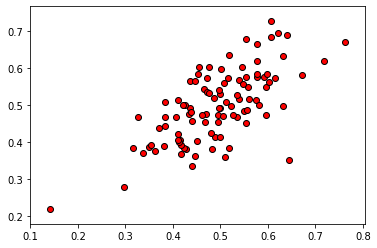

In [26]:
ax = plt.scatter(data_x, data_y, c='r', edgecolors='black');

In [43]:
# Constructing model variables

W = tf.Variable(rng.randn(),name="weight")  
b = tf.Variable(rng.randn(),name="bias")  

In [44]:
# Optimization Process
optimizer = tf.optimizers.SGD(learning_rate = 0.01)

def optimize():
    with tf.GradientTape() as g:
        # Constructing the model
        y_hat = w * data_x + b
        # Loss function: Mean squared error
        loss_mse = tf.reduce_mean(tf.square(data_y - y_hat), name='loss_mse')

    gradients = g.gradient(loss_mse,[w,b])  
    optimizer.apply_gradients(zip(gradients,[w,b])) 
    return w, b 

In [45]:
# Training Loop 

epochs = 1000
for step in range(1, epochs+1):
    w, b = optimize()
        
    if step % 50 == 0:
        pred_y = [w * x + b for x in data_x]
        loss_mse = tf.reduce_mean(tf.square(data_y - pred_y), name='loss_mse')
        print(f'step {step}, loss {loss_mse}')


step 50, loss 0.010100787986621172
step 100, loss 0.00673376666058401
step 150, loss 0.006443298968789865
step 200, loss 0.006400386777552145
step 250, loss 0.006377656899372064
step 300, loss 0.006356823643230819
step 350, loss 0.0063364224364522
step 400, loss 0.006316327030290787
step 450, loss 0.0062965216673166536
step 500, loss 0.006277004482614621
step 550, loss 0.006257766680817287
step 600, loss 0.006238811353558622
step 650, loss 0.006220126817960594
step 700, loss 0.006201714215575249
step 750, loss 0.006183568384682034
step 800, loss 0.006165683391688262
step 850, loss 0.006148061241073433
step 900, loss 0.006130692718387457
step 950, loss 0.006113573744811192
step 1000, loss 0.006096704640081952


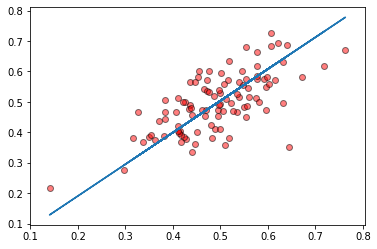

In [46]:
plt.scatter(data_x, data_y, c='r', edgecolor='black', alpha=0.5);
plt.plot(data_x, pred_y)